# Centroid Based Clustering


Centroid-based clustering is a type of clustering algorithm that groups data points into clusters based on their proximity to a centroid. A centroid is a data point that represents the center of a cluster, and it is typically calculated as the mean of all the data points in the cluster.

![alt text](https://images.ctfassets.net/1wryd5vd9xez/68kS85be7tHuBPfgMILDPi/0539c5362c7bb20cb9e048b64e62da5a/https___cdn-images-1.medium.com_max_2800_0_aybNKPUkunvrHqNK.)

There are many different algorithms that can be used for centroid-based clustering. Some of the most popular algorithms include:

- **K-means clustering:** This is the most popular centroid-based clustering algorithm. It works by first randomly selecting k data points as the initial centroids. The algorithm then iterates through the following steps until convergence:
    - Assign each data point to the cluster whose centroid is closest to it.
    - Calculate the new centroid for each cluster by averaging the data points in the cluster.
    - Repeat steps 1 and 2 until the centroids no longer move.

**K-medoids clustering:** This is a variation of k-means clustering that uses medoids instead of centroids. A medoid is a data point that is representative of its cluster, and it is typically calculated as the median of all the data points in the cluster.

**Fuzzy c-means clustering:** This is a more flexible version of k-means clustering that allows each data point to belong to multiple clusters with different degrees of membership.

**Gaussian mixture models:** This is a probabilistic approach to centroid-based clustering that models each cluster as a Gaussian distribution.

Centroid-based clustering is a simple and efficient clustering algorithm, but it can be sensitive to the initial conditions of the centroids. This means that if the initial centroids are not well-chosen, the algorithm may not converge to a good clustering solution.

Here are some of the advantages of centroid-based clustering:

- It is a simple and efficient algorithm.
- It can be used to cluster data points in a variety of dimensions.
- It is relatively insensitive to noise.

Here are some of the disadvantages of centroid-based clustering:

- It can be sensitive to the initial conditions of the centroids.
- It can be difficult to choose the number of clusters (k).
- It can be difficult to interpret the results of the clustering.

Overall, centroid-based clustering is a powerful tool for clustering data points. It is simple to implement and efficient to run. However, it is important to be aware of its limitations, such as its sensitivity to the initial conditions of the centroids.

Here are some examples of where centroid-based clustering can be used:

- **Customer segmentation:** This is the process of dividing customers into groups based on their shared characteristics. This can be used to target marketing campaigns or to develop new products and services.

- **Medical diagnosis:** This is the process of identifying diseases based on a patient's symptoms. Centroid-based clustering can be used to group patients with similar symptoms together, which can help doctors to make more accurate diagnoses.

- **Fraud detection:** This is the process of identifying fraudulent transactions. Centroid-based clustering can be used to group transactions that are similar in nature together, which can help to identify fraudulent transactions.

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [182]:
data=pd.read_excel("mall_customers.xlsx")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [184]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy="mean")

In [185]:
inputs=data.iloc[:,3:5]
inputs.values.T

array([[ 15,  15,  16,  16,  17,  17,  18,  18,  19,  19,  19,  19,  20,
         20,  20,  20,  21,  21,  23,  23,  24,  24,  25,  25,  28,  28,
         28,  28,  29,  29,  30,  30,  33,  33,  33,  33,  34,  34,  37,
         37,  38,  38,  39,  39,  39,  39,  40,  40,  40,  40,  42,  42,
         43,  43,  43,  43,  44,  44,  46,  46,  46,  46,  47,  47,  48,
         48,  48,  48,  48,  48,  49,  49,  50,  50,  54,  54,  54,  54,
         54,  54,  54,  54,  54,  54,  54,  54,  57,  57,  58,  58,  59,
         59,  60,  60,  60,  60,  60,  60,  61,  61,  62,  62,  62,  62,
         62,  62,  63,  63,  63,  63,  63,  63,  64,  64,  65,  65,  65,
         65,  67,  67,  67,  67,  69,  69,  70,  70,  71,  71,  71,  71,
         71,  71,  72,  72,  73,  73,  73,  73,  74,  74,  75,  75,  76,
         76,  77,  77,  77,  77,  78,  78,  78,  78,  78,  78,  78,  78,
         78,  78,  78,  78,  79,  79,  81,  81,  85,  85,  86,  86,  87,
         87,  87,  87,  87,  87,  88,  88,  88,  88

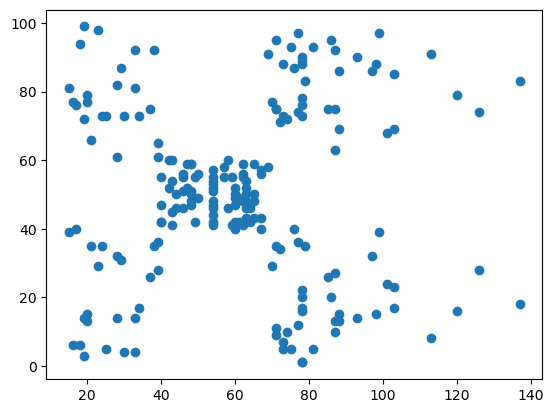

In [186]:
plt.scatter(inputs.iloc[:,0],inputs.iloc[:,1])

In [187]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inputs=sc.fit_transform(inputs)

In [188]:
inputs.shape

(200, 2)

In [189]:
inputs.T

array([[-1.73899919, -1.73899919, -1.70082976, -1.70082976, -1.66266033,
        -1.66266033, -1.62449091, -1.62449091, -1.58632148, -1.58632148,
        -1.58632148, -1.58632148, -1.54815205, -1.54815205, -1.54815205,
        -1.54815205, -1.50998262, -1.50998262, -1.43364376, -1.43364376,
        -1.39547433, -1.39547433, -1.3573049 , -1.3573049 , -1.24279661,
        -1.24279661, -1.24279661, -1.24279661, -1.20462718, -1.20462718,
        -1.16645776, -1.16645776, -1.05194947, -1.05194947, -1.05194947,
        -1.05194947, -1.01378004, -1.01378004, -0.89927175, -0.89927175,
        -0.86110232, -0.86110232, -0.82293289, -0.82293289, -0.82293289,
        -0.82293289, -0.78476346, -0.78476346, -0.78476346, -0.78476346,
        -0.70842461, -0.70842461, -0.67025518, -0.67025518, -0.67025518,
        -0.67025518, -0.63208575, -0.63208575, -0.55574689, -0.55574689,
        -0.55574689, -0.55574689, -0.51757746, -0.51757746, -0.47940803,
        -0.47940803, -0.47940803, -0.47940803, -0.4

In [190]:
inputs=impute.fit_transform(inputs)

In [191]:
from sklearn.cluster import KMeans

In [192]:
k_mean=KMeans(n_clusters=5)

In [193]:
k_mean.fit(inputs)

KMeans(n_clusters=5)

In [194]:
y_pred=k_mean.predict(inputs)

In [195]:
y_pred

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1,
       0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [196]:
center=k_mean.cluster_centers_

In [197]:
centres=sc.inverse_transform(k_mean.cluster_centers_)
centres

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [198]:
inputs[y_pred==0,0]

array([-1.73899919, -1.70082976, -1.66266033, -1.62449091, -1.58632148,
       -1.58632148, -1.54815205, -1.54815205, -1.50998262, -1.43364376,
       -1.39547433, -1.3573049 , -1.24279661, -1.24279661, -1.20462718,
       -1.16645776, -1.05194947, -1.05194947, -1.01378004, -0.89927175,
       -0.86110232, -0.82293289, -0.82293289])

In [199]:
k_mean.inertia_

65.56840815571681

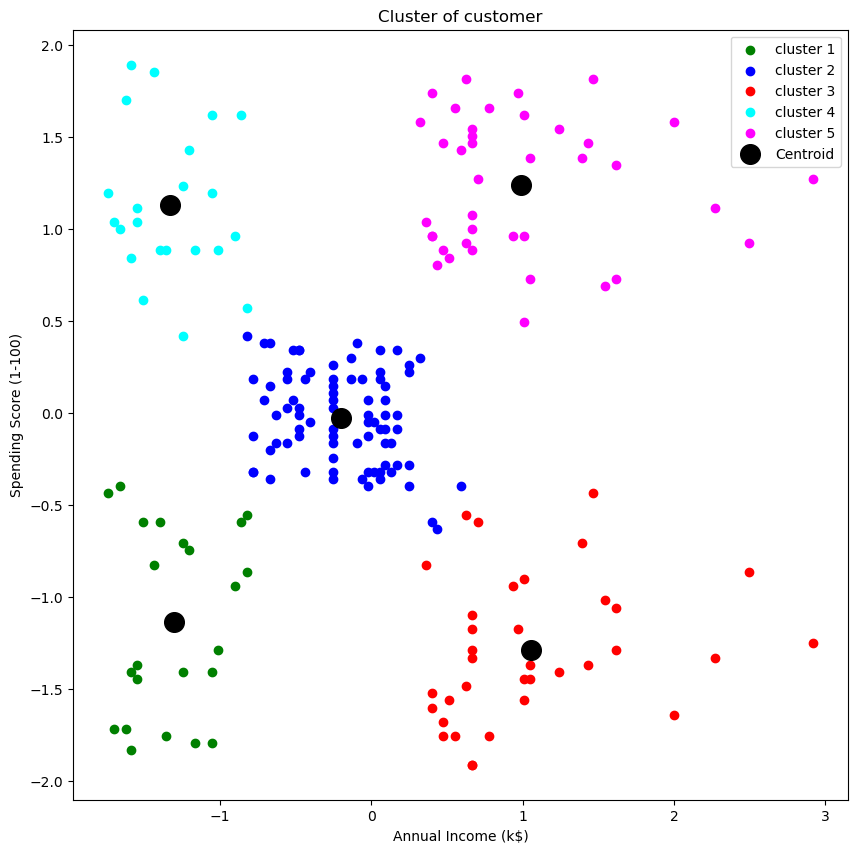

In [205]:
plt.figure(figsize=[10,10])
plt.scatter(inputs[y_pred==0,0],inputs[y_pred==0,1],c="green",label="cluster 1")
plt.scatter(inputs[y_pred==1,0],inputs[y_pred==1,1],c="blue",label="cluster 2")
plt.scatter(inputs[y_pred==2,0],inputs[y_pred==2,1],c="red",label="cluster 3")
plt.scatter(inputs[y_pred==3,0],inputs[y_pred==3,1],c="cyan",label="cluster 4")
plt.scatter(inputs[y_pred==4,0],inputs[y_pred==4,1],c="magenta",label="cluster 5")
plt.scatter(center[:,0],center[:,1],c="black",label="Centroid",s=200)
plt.title("Cluster of customer")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()

# How to Find Best K value?

## Elbow Curve Method

- Recall that the basic idea behind partitioning methods, such as k-means clustering, is to define clusters such that the total intra-cluster variation [or total within-cluster sum of square (WSS)] is minimized. 

- The total wss measures the compactness of the clustering, and we want it to be as small as possible. The elbow method runs k-means clustering (kmeans number of clusters) on the dataset for a range of values of k (say 1 to 10) 

- In the elbow method, we plot mean distance and look for the elbow point where the rate of decrease shifts. For each k, calculate the total within-cluster sum of squares (WSS). This elbow point can be used to determine K.

![alt text](https://lh4.googleusercontent.com/TAnBQEvH0TxofT0kcKlt6u780ktXD5kbM8-kAqfoYHwmI9LZ4FAZCdeMcTSc9oP8mL7qJ-PVpe7VVPSDJ8dF_JSdSdSmNkFPbU4pF4XByneiWT1gyFISjFhSimBy1_reJ0mSa9iv)

In [201]:
import warnings
warnings.filterwarnings("ignore")

In [202]:
wcss_list=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i)
    kmean.fit(inputs)
    wcss_list.append(kmean.inertia_)
    print("Current inertia value with k ",i," :",kmean.inertia_)

Current inertia value with k  1  : 400.0
Current inertia value with k  2  : 269.0167937490666
Current inertia value with k  3  : 157.70400815035947
Current inertia value with k  4  : 108.92131661364357
Current inertia value with k  5  : 65.56840815571681
Current inertia value with k  6  : 55.067795914519664
Current inertia value with k  7  : 44.91271612308711
Current inertia value with k  8  : 37.319122878338824
Current inertia value with k  9  : 32.448651348336334
Current inertia value with k  10  : 29.316377372329587


Text(0, 0.5, 'wcss_list')

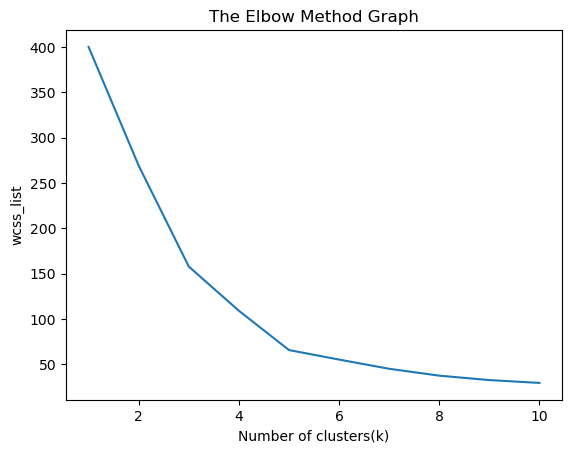

In [203]:
plt.plot(range(1,11) ,wcss_list)
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')

## Silhouette Analysis

The silhouette coefficient or silhouette score kmeans is a measure of **how similar a data point is within-cluster (cohesion) compared to other clusters (separation)**. The Silhouette score can be easily calculated in Python using the metrics module of the scikit-learn/sklearn library.

- Select a range of values of k (say 1 to 10).
- Plot Silhouette coefﬁcient for each value of K.

The equation for calculating the silhouette coefﬁcient for a particular data point:

![alt text](https://av-eks-blogoptimized.s3.amazonaws.com/45590cluster1.png)

- S(i) is the silhouette coefficient of the data point i.
- a(i) is the average distance between i and all the other data points in the cluster to which i belongs.
- b(i) is the average distance from i to all clusters to which i does not belong.

![alt text](https://av-eks-blogoptimized.s3.amazonaws.com/90733cluster2.png)

![alt text](https://av-eks-blogoptimized.s3.amazonaws.com/56608cluster3.png)

We will then calculate the average_silhouette for every k.

![alt text](https://av-eks-blogoptimized.s3.amazonaws.com/42277cluster4.png)

### Points to Remember While Calculating Silhouette Coefficient:

1. The value of the silhouette coefﬁcient is between [-1, 1].
2. A score of 1 denotes the best, meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters.
3. The worst value is -1. Values near 0 denote overlapping clusters.

k = 2 | silhouette score = 0.3146990432802128
k = 3 | silhouette score = 0.46658474419000145
k = 4 | silhouette score = 0.4939069237513199
k = 5 | silhouette score = 0.5546571631111091
k = 6 | silhouette score = 0.5398800926790663
k = 7 | silhouette score = 0.5263454490712252
k = 8 | silhouette score = 0.4558438123118706
k = 9 | silhouette score = 0.45532159949822093
k = 10 | silhouette score = 0.4476280825932578


Text(0, 0.5, 'average_silhoutte_coefficeint_list')

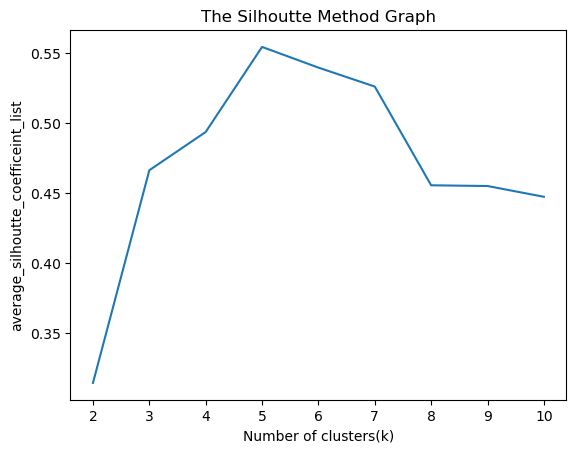

In [204]:
from sklearn.metrics import silhouette_score
silhouette_list=[]
for i in range(2,11):
    kmean=KMeans(n_clusters=i,random_state=42)
    label=kmean.fit_predict(inputs)
    silhouette_scores=silhouette_score(inputs,label)
    average_silhouette_score=np.mean(silhouette_scores)
    silhouette_list.append(average_silhouette_score)
    print("k = {} | silhouette score = {}".format(i, average_silhouette_score))
    
plt.plot(range(2,11),silhouette_list)
plt.title('The Silhoutte Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('average_silhoutte_coefficeint_list')   

From both Elbow method and Silhouette analysis we get 5 as the no of clusters for this data